### Import necessary libraies

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

### Reading tweet_global_warming.csv file

In [63]:
tweets_apple=pd.read_csv("data/apple.csv")
tweets_apple.head()

,tweet
0,Wow. Yall needa step it up @Apple RT @heynyla:...
1,What Happened To Apple Inc? http://t.co/FJEX...
2,Thank u @apple I can now compile all of the pi...
3,The oddly uplifting story of the Apple co-foun...
4,@apple can i exchange my iphone for a differen...


### Function to generate polarity

In [64]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def get_tweet_polarity(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

### Selecting 500 tweets randomly

In [65]:
tweets_apple = tweets_apple.sample(n=500)

### Applying the above function on the sampled tweets

In [66]:
tweets_apple['polarity'] = tweets_apple['tweet'].apply(getTextPolarity)
tweets_apple['polarityClass'] = tweets_apple['tweet'].apply(get_tweet_polarity)
tweets_apple.head()

,tweet,polarity,polarityClass
211,Myths vs. Reality-Full Time #Trading http://t....,0.000,neutral
1516,@Apple co-founder Steve Wozniak talks about St...,0.100,positive
1324,"Dear @Apple, please fix your AWDL issues.. htt...",0.000,neutral
305,@apple should buy @nintendo and @sega. They'd ...,-0.400,negative
1268,@ganondaIf why is the quality so bad on these ...,-0.375,negative


### Plotting the polarity values using histogram

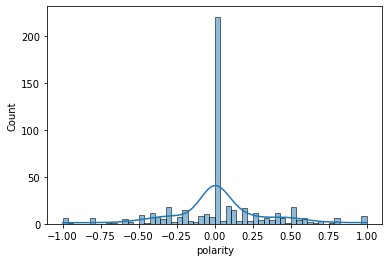

In [67]:
sns.histplot(data=tweets_apple, x="polarity", kde=True)

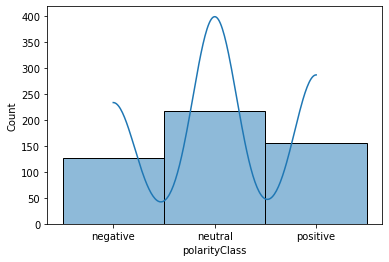

In [68]:
tweets_apple['polarityClass'] = pd.Categorical(tweets_apple['polarityClass'], ['negative','neutral','positive'])
sns.histplot(data=tweets_apple, x="polarityClass", kde=True)

### Function to generate subjectivity


In [69]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

### Applying the above function on the sampled tweets

In [70]:
tweets_apple['subjectivity'] = tweets_apple['tweet'].apply(getTextSubjectivity)
tweets_apple.head()

,tweet,polarity,polarityClass,subjectivity
211,Myths vs. Reality-Full Time #Trading http://t....,0.000,neutral,0.000000
1516,@Apple co-founder Steve Wozniak talks about St...,0.100,positive,0.300000
1324,"Dear @Apple, please fix your AWDL issues.. htt...",0.000,neutral,0.000000
305,@apple should buy @nintendo and @sega. They'd ...,-0.400,negative,0.400000
1268,@ganondaIf why is the quality so bad on these ...,-0.375,negative,0.358333


### Plotting the subjectivity values using histogram

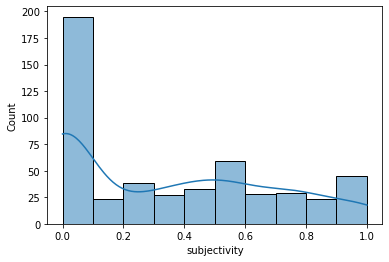

In [72]:
sns.histplot(data=tweets_apple, x="subjectivity", kde=True)

### Conclusion

* As seen from the polarity analysis, most of the tweets are neutral. Since most of the tweets are objective as seen from the figure above a very small subset has subjective tweets out of the randomly selected tweets. Moreover, the polarity analysis tells us that, most of the people have written a factual or objective tweet about apple, therefore the most common polarity class of tweets is neutral. 

* The histplots of the polarityClass and the subjectivity has been plot by using seaborn along with their kde. The polarityClass feature is generated by the function get_tweet_polarity which classifies the tweet as positive, negetive or neutral based on their sentiment polarity.

* Finally the number of positive sentiments are slightly greater than the negetive sentiments from the selected random set of tweets, implying that the customers have a positive attitude towards the company. After re-running the cells multiple times, the output produces almost the same results, with the randomly selected set of tweets implying that the collective customer feedback/comments about apple is positive.